## Global Shark Attack File Analysis for Florida, USA

The Shark Research Institute (SRI) maintains a log of shark attacks worldwide, the Global Shark Attack File (GSAF). It is continually updated as new incidents occur, and was started in 1992 by the SRI. The current log file, in Excel form, can be downloaded from a link at the site below:

https://www.sharks.org/global-shark-attack-file

This project is a follow-on to the worldwide shark attack analysis previously completed, and can be found here: https://github.com/kwarren-data/portfolio/blob/main/gsaf_analysis_v2.ipynb

The goal of this project to clean and analyze recorded shark attacks in florida since 1990(?). Some of the areas of interest in this project are type of incident (provoked, unprovoked, etc.), fatalities, the shark species involved and activity of the human.

In [1]:
# Import the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None 

In [2]:
# Read in the cleaned CSV file from the Worldwide GSAF Data Analysis project
gsaf = pd.read_csv('/home/ken/my_datasets/GSAF/GSAF_cleaned_v2.csv')
gsaf.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,...,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,Fatal,species,Species,Species ID
0,2020.02.05,05-Feb-2020,2020,Unprovoked,USA,Maui,NaN,stand up paddle boarding,NaN,NaN,...,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,0,"['tiger', 'shark']",tiger shark,tiger shark
1,2020.01.30.R,Reported 30-Jan-2020,2020,Provoked,BAHAMAS,Exumas,NaN,swimming,Ana Bruna Avila,F,...,PROVOKED INCIDENT Scratches to left wrist,N,NaN,unknown,"K. McMurray, TrackingSharks.com",NaN,0,['unknown'],unknown,TBD
2,2020.01.17,17-Jan-2020,2020,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,surfing,Will Schroeter,M,...,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,0,"['a', 'small', 'shark']",a small shark,TBD
3,2020.01.16,16-Jan-2020,2020,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,surfing,Jordan King,F,...,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,0,"['broadnose', 'seven', 'gill', 'shark']",broadnose seven gill shark,7-gill shark
4,2020.01.13,13-Jan-2020,2020,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",surfing,Samuel Horne,M,...,Lacerations to foot,N,14h33,unknown,"C. Creswell, GSAF",2020.01.13-Horne.pdf,0,['unknown'],unknown,TBD


In [3]:
florida = gsaf[gsaf['Area'] == 'Florida']
florida.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 20 to 5704
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             1044 non-null   object
 1   Date                    1044 non-null   object
 2   Year                    1044 non-null   int64 
 3   Type                    1044 non-null   object
 4   Country                 1044 non-null   object
 5   Area                    1044 non-null   object
 6   Location                1034 non-null   object
 7   Activity                1044 non-null   object
 8   Name                    1030 non-null   object
 9   Unnamed: 9              2 non-null      object
 10  Age                     844 non-null    object
 11  Injury                  1041 non-null   object
 12  Fatal (Y/N)             1044 non-null   object
 13  Time                    747 non-null    object
 14  Species                 1044 non-null   object
 15  Inv

(array([ 10.,  17.,  18.,   6.,  37.,  80.,  90., 132., 330., 324.]),
 array([1901. , 1912.8, 1924.6, 1936.4, 1948.2, 1960. , 1971.8, 1983.6,
        1995.4, 2007.2, 2019. ]),
 <BarContainer object of 10 artists>)

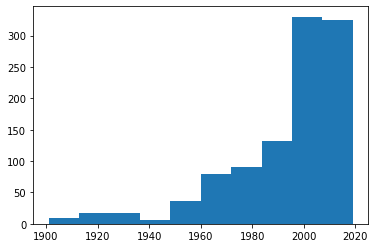

In [4]:
# Plot histogram of the Year column to see general trend of attacks since 1900
plt.hist(florida['Year'])

While there were shark attacks in Florida recorded since 1900, the majority has been since the late 1900s. We will isolate the attacks since 1990 for further analysis.

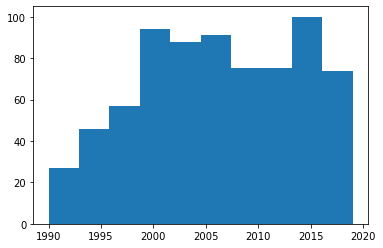

In [5]:
florida_30 = florida[florida['Year'] >= 1990]
plt.hist(florida_30['Year'])
plt.show()

### Provoked versus Unprovoked Attacks

The dataset has been narrowed down to those attacks recorded since 1990. Let's take a look at whether the majority have been provoked or unprovoked attacks.

<AxesSubplot:>

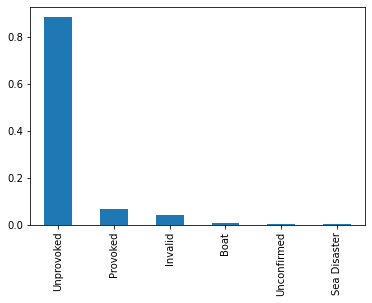

In [6]:
florida_30['Type'].value_counts(normalize=True).plot.bar()

In [7]:
print('Counts:','\n',florida_30['Type'].value_counts(), '\n')
print('Percentages:','\n', florida_30['Type'].value_counts(normalize=True) * 100)

Counts: 
 Unprovoked      641
Provoked         47
Invalid          30
Boat              5
Unconfirmed       3
Sea Disaster      1
Name: Type, dtype: int64 

Percentages: 
 Unprovoked      88.170564
Provoked         6.464924
Invalid          4.126547
Boat             0.687758
Unconfirmed      0.412655
Sea Disaster     0.137552
Name: Type, dtype: float64


Of the 1044 recorded shark attacks in Florida since 1990, 88% (641) were unprovoked attacks. Provoked attacks were attributed to about 6.5% (47) of the total. Let's see if there has been any trends in unprovoked vs provoked attacks over the last 30 years in Florida.

### Types of Attacks by Year Since 1990

Now, we will look at the types of attacks by year since 1990. Are there more provoked attacks recently or are there any differences over the last 30 years? The first step will be to combine the types: Invalid, Boat, Unconfirmed, and Sea Disater. Those types will be replaced with 'Misc'.

In [8]:
# Isolating just the unprovoked and provoked attacks - ignoring the others
prov = florida_30[(florida_30['Type'] == 'Provoked') | (florida_30['Type'] == 'Unprovoked')]
prov.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,...,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,Fatal,species,Species,Species ID
20,2019.11.30.b,30-Nov-2019,2019,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",surfing,Chandler Moore,M,...,"No injury, knocked from his board by the shark",N,NaN,Juvenile blacktip shark,"NY Post, 12/2/2019",2019.11.30.b-Moore.pdf,0,"['juvenile', 'blacktip', 'shark']",juvenile blacktip shark,blacktip shark
26,2019.11.12,11-Nov-2019,2019,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",surfing,Miller,M,...,Lacerations to left foot,N,NaN,4' to 5' blacktip shark,"K.McMurray, TrackingSharks.com",2019.11.12-Miller.pdf,0,"['4', 'to', '5', 'blacktip', 'shark']",very long,TBD
31,2019.10.27,27-Oct-2019,2019,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",surfing,Stephen Michelena,NaN,...,Minor cuts when he jumped off his board and la...,N,12h45,4' to 5' shark,"Kevin McMurray, TrackingSharks.com",NaN,0,"['4', 'to', '5', 'shark']",4 to 5 shark,TBD


In [9]:
# Create a dictionary of the number of provoked attacks per year
provs = prov[prov['Type'] == 'Provoked']
provs = provs.groupby('Year')['Type'].count().to_dict()

# Add the Years without any provoked attacks to the provoked dictionary to match the entries for unprovoked
for i in range(1990, 2020):
    if i not in provs.keys():
        provs[i] = 0
print(provs)

# Create a dictionary of the number of unprovoked attacks per year
unprovs = prov[prov['Type'] == 'Unprovoked']
unprovs = unprovs.groupby('Year')['Type'].count().to_dict()
print(unprovs)

{1991: 2, 1992: 1, 1994: 1, 1996: 1, 1998: 2, 1999: 1, 2001: 2, 2002: 4, 2003: 4, 2005: 2, 2006: 3, 2007: 2, 2008: 3, 2009: 2, 2010: 4, 2011: 1, 2012: 2, 2013: 3, 2014: 2, 2016: 2, 2018: 1, 2019: 2, 1990: 0, 1993: 0, 1995: 0, 1997: 0, 2000: 0, 2004: 0, 2015: 0, 2017: 0}
{1990: 8, 1991: 8, 1992: 6, 1993: 8, 1994: 11, 1995: 24, 1996: 13, 1997: 21, 1998: 19, 1999: 20, 2000: 31, 2001: 35, 2002: 27, 2003: 38, 2004: 11, 2005: 19, 2006: 24, 2007: 33, 2008: 34, 2009: 17, 2010: 13, 2011: 15, 2012: 29, 2013: 24, 2014: 29, 2015: 28, 2016: 30, 2017: 33, 2018: 10, 2019: 23}


In [10]:
# Calculate the average number of unprovoked & provoked attacks since 1990
avg_provs = sum(provs.values()) / len(provs)
print('Average # of Provoked Attacks:',round(avg_provs, 2))

avg_unprovs = sum(unprovs.values()) / len(unprovs)
print('Average # of Unprovoked Attacks:',round(avg_unprovs,2))

Average # of Provoked Attacks: 1.57
Average # of Unprovoked Attacks: 21.37


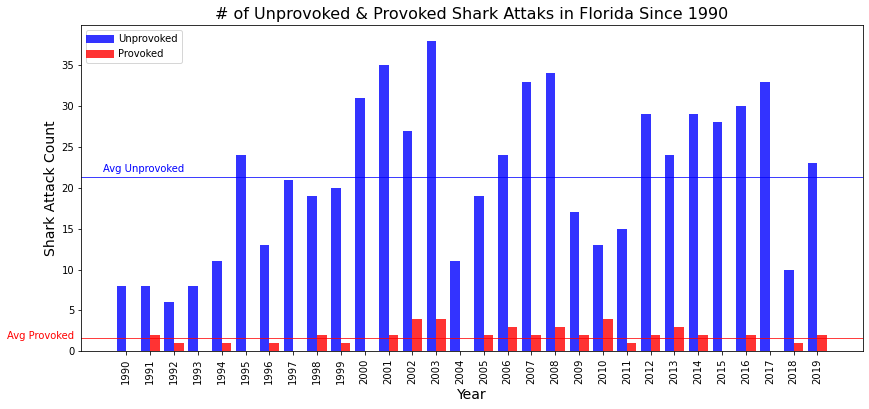

In [11]:
# Create a custom legend for the provoked and unprovoked data
from matplotlib.lines import Line2D
custom_legend = [Line2D([0], [0], color='blue', lw=8, alpha=0.8),
                Line2D([0], [0], color='red', lw=8, alpha=0.8)]

fig, ax = plt.subplots(figsize=(14,6))
plt.bar(unprovs.keys(), unprovs.values(), color = 'blue', alpha = 0.8, width = -0.4, align = 'edge')
plt.bar(provs.keys(), provs.values(), color = 'red', alpha = 0.8, width = 0.4, align = 'edge')
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Shark Attack Count",fontsize=14)
ax.set_xticks(range(1990,2020))
plt.xticks(rotation=90)
plt.axhline(avg_unprovs, linewidth=0.75, color='blue')
plt.axhline(avg_provs, linewidth=0.75, color='red')
ax.legend(custom_legend, ['Unprovoked', 'Provoked'], loc='upper left')
ax.text(1989, 22, 'Avg Unprovoked', color='blue')
ax.text(1985, 1.56, 'Avg Provoked', color='red')
plt.title('# of Unprovoked & Provoked Shark Attaks in Florida Since 1990', fontsize=16)
plt.show()

The number of unprovoked shark attacks since 1990 in Florida is quite variable. The average number of unprovoked attacks is 21.37 and 1.57 for provoked attacks. The number of attacks is lowest during the early 1990's, then seems to go through a cycle of increasing then decreasing number of attacks. From this look, no major patterns are obvious, so we will now look at fatalities in Florida due to shark attacks.

### Fatalities in Florida due to Shark Attacks

Now let's take a look at the shark attack fatalities in Florida since 1990.

In [12]:
# A few descriptive statistics for fatalities
fatal_count = florida_30['Fatal'].value_counts()
fatal_percent = florida_30['Fatal'].value_counts(normalize=True) * 100
print('Fatality Count:', '\n', fatal_count)
print('\n')
print('Fatality Percentage:', '\n', fatal_percent)

Fatality Count: 
 0    719
1      8
Name: Fatal, dtype: int64


Fatality Percentage: 
 0    98.899587
1     1.100413
Name: Fatal, dtype: float64


Of the 727 shark attacks in Florida since 1990, only 8 (1.1%) were fatal to the human victim. That's good news for people going into the water in Florida. From the previous analysis, the USA had a fatality rate of about 6% since 1900. Before moving on to the human activities, let's compare Florida to some other states in terms of fatality.

#### Which US states have the most shark attacks and fatalities?

In [13]:
# Isolate the USA attacks since 1990
usa = gsaf[gsaf['Country'] == 'USA']
usa = usa[usa['Year'] >= 1990]
usa['Area'].value_counts()

Florida              727
Hawaii               186
California           152
South Carolina        97
North Carolina        79
Texas                 38
Oregon                22
Alabama                9
Virginia               7
Massachusetts          7
New Jersey             6
New York               5
Georgia                5
Puerto Rico            3
Maryland               3
Louisiana              3
Rhode Island           2
Guam                   2
Delaware               2
Palmyra Atoll          2
Alaska                 1
Maui                   1
New Mexico             1
Missouri               1
Johnston Atoll         1
Washington             1
Kentucky               1
US Virgin Islands      1
Maine                  1
Cayman Islands         1
Mississippi            1
Name: Area, dtype: int64

Since 1990, Florida had over 700 recorded shark attacks. The second highest was 186 in Hawaii, and California followed with 152 attacks. For further analysis, we will only look at the top 7 states in terms of shark attacks (attacks >= 20).

In [14]:
# Create a fatality dataframe by state
usa_fatal = usa.groupby('Area')['Fatal'].sum()
usa_fatal_df = pd.DataFrame(usa_fatal)
usa_fatal_df.columns = ['Fatal']
usa_fatal_df.reset_index(inplace=True)

# Create a count of incidents dataframe by state
usa_count = usa.groupby('Area')['Fatal (Y/N)'].count()
usa_count_df = pd.DataFrame(usa_count)
usa_count_df.columns = ['Count']
usa_count_df.reset_index(inplace=True)

# Merge the fatality and count dataframes
usa_fatal_df = pd.merge(usa_fatal_df, usa_count_df, how = 'left', on = 'Area')
print(usa_fatal_df)

                 Area  Fatal  Count
0             Alabama      0      9
1              Alaska      0      1
2          California      6    152
3      Cayman Islands      0      1
4            Delaware      0      2
5             Florida      8    727
6             Georgia      0      5
7                Guam      0      2
8              Hawaii     13    186
9      Johnston Atoll      0      1
10           Kentucky      0      1
11          Louisiana      0      3
12              Maine      0      1
13           Maryland      1      3
14      Massachusetts      0      7
15               Maui      0      1
16        Mississippi      0      1
17           Missouri      0      1
18         New Jersey      0      6
19         New Mexico      0      1
20           New York      0      5
21     North Carolina      2     79
22             Oregon      0     22
23      Palmyra Atoll      0      2
24        Puerto Rico      1      3
25       Rhode Island      0      2
26     South Carolina      1

In [15]:
# Calculate the average fatality rate for the USA since 1990
avg_usa_fatal = round(usa_fatal_df['Fatal'].sum() / usa_fatal_df['Count'].sum() * 100, 2)
print('Avg Fatality Rate in the USA since 1990:', avg_usa_fatal,'%')

Avg Fatality Rate in the USA since 1990: 2.41 %


In [16]:
usa7 = usa_fatal_df.sort_values(by=['Count'], ascending=False, ignore_index=True)[:7]
print(usa7)

             Area  Fatal  Count
0         Florida      8    727
1          Hawaii     13    186
2      California      6    152
3  South Carolina      1     97
4  North Carolina      2     79
5           Texas      0     38
6          Oregon      0     22


In [17]:
# Calculate a Fatality Rate for the top 5 states
usa7['Fatality Rate'] = round(usa7['Fatal'] / usa7['Count'] * 100, 2)
print(usa7)

             Area  Fatal  Count  Fatality Rate
0         Florida      8    727           1.10
1          Hawaii     13    186           6.99
2      California      6    152           3.95
3  South Carolina      1     97           1.03
4  North Carolina      2     79           2.53
5           Texas      0     38           0.00
6          Oregon      0     22           0.00


Hawaii had the highest fatality rate since 1990 at nearly 7%. The next highest was California at about 4%. 

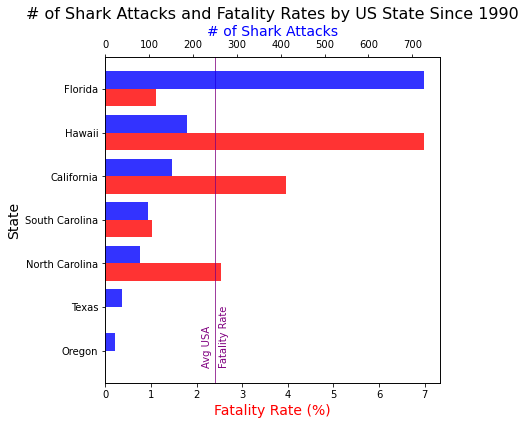

In [18]:
# Create a chart with the number of attacks and fatality rates for the top 20 countries
usa7.sort_values(by=['Count'], ascending=True, inplace=True) # sorting to visualization purposes
fig,ax = plt.subplots(figsize=(6,6))
ax.barh(usa7['Area'], usa7['Fatality Rate'],color="red", alpha=0.8, height=-0.4, align='edge')
ax.set_xlabel("Fatality Rate (%)",color="red",fontsize=14)
ax.set_ylabel("State",fontsize=14)
plt.axvline(avg_usa_fatal, linewidth=0.75, color='purple')
ax.text(2.12, -0.35, 'Avg USA', color='purple', rotation=90)
ax.text(2.5, -0.35, 'Fatality Rate', color='purple', rotation=90)
ax2=ax.twiny()
ax2.barh(usa7['Area'], usa7['Count'], color="blue", alpha=0.8, height=0.4, align='edge')
ax2.set_xlabel("# of Shark Attacks",color="blue",fontsize=14)
plt.title('# of Shark Attacks and Fatality Rates by US State Since 1990', fontsize=16)
plt.show()

The original plan was to focus on Florida. After looking at the fatality data for the USA since 1990, it seems that it may be better to look at the top 5 states in terms of attacks and attempt to see if the species of shark matters to the fatality rate. Worldwide, Tiger Sharks and White Sharks had the highest fatality rates (around 24%), so we could expect that those two species of shark may be more common in attacks in Hawaii & California. 

### Shark Species Identified in Attacks in the Top 5 States with the Most Attacks

In [19]:
top5 = usa[(usa['Area'] == 'Florida') | (usa['Area'] == 'Hawaii') | (usa['Area'] == 'California') | 
           (usa['Area'] == 'South Carolina') | (usa['Area'] == 'North Carolina')]
top5.shape

(1241, 21)

In [20]:
top5['Species ID'].value_counts()

TBD                       1045
tiger shark                 50
white shark                 40
bull shark                  27
spinner shark               23
blacktip shark              17
nurse shark                 16
lemon shark                  8
hammerhead shark             5
cookiecutter shark           2
salmon shark                 2
mako shark                   2
oceanic whitetip shark       1
galapagos shark              1
sandbar shark                1
thresher shark               1
Name: Species ID, dtype: int64

In [21]:
top5['Species ID'].value_counts(normalize = True) * 100

TBD                       84.206285
tiger shark                4.029009
white shark                3.223207
bull shark                 2.175665
spinner shark              1.853344
blacktip shark             1.369863
nurse shark                1.289283
lemon shark                0.644641
hammerhead shark           0.402901
cookiecutter shark         0.161160
salmon shark               0.161160
mako shark                 0.161160
oceanic whitetip shark     0.080580
galapagos shark            0.080580
sandbar shark              0.080580
thresher shark             0.080580
Name: Species ID, dtype: float64

Of the 1241 recorded shark attack in the US since 1990, the shark species was not determined for 1045 (84%). There's very little actual data to go on regarding shark species, but we'll take a look at the species identified for fatalities in the dataset.

In [22]:
# Isolate the fatalities and non-TBD species
species_fatal = top5[top5['Fatal'] == 1]
species_fatal['Species ID'].value_counts()

TBD            25
tiger shark     5
Name: Species ID, dtype: int64

Of the 30 fatal attacks recorded since 1990 in the top 5 states, only 5 were attributed to a shark species. In all 5 cases, the shark species identified was the Tiger Shark. The sheer number of unknown (TBD) species and relatively few positively identified means we cannot say for certain why some states have a higher fatality rate than others. We can guess that the reason why Hawaii has the highest fatality rate (7%) is due to a higher number of attacks by Tiger Sharks. Knowing there are significant populations of white sharks off California, it's surprising that there were more attacks attributed to white sharks there and the fatality rate would have been higher. More accurate species identification would be beneficial to any further analysis of shark attacks by species.

### Activity of Human Victims in Florida Shark Attacks

While very few shark attacks in Florida have been fatal, Florida does lead the US in the number of shark attacks. Let's take a look at the activities that the victims were doing while gettting attacked.

In [23]:
print(florida_30['Activity'].value_counts())
print(florida_30.shape)

surfing                       321
swimming                       93
wading                         86
body boarding                  40
unknown                        36
                             ... 
fishing for snapper             1
swimming, towing surfboard      1
crawling                        1
kite boarding                   1
board sailing                   1
Name: Activity, Length: 93, dtype: int64
(727, 21)


Unsurprisingly, surfing was, by far, the most common activity of shark attack victims in Florida since 1990, with 321 attacks. Swimming was the second most common with 93, and it was followed closely by wading with 86. Like the worldwide dataset, there are a lot of activities with low numbers that are similar and could be grouped together. Plus, there are others where a couple different activities are included, such as the "swimming or paddle boarding" and "wading to shore after surfing". How do we best account for those? Let's create a dictionary with all the entries for the Activity column.

In [24]:
# Create a dictionary of the activities
fl_act = florida_30['Activity'].value_counts().to_dict()
print(fl_act)

{'surfing': 321, 'swimming': 93, 'wading': 86, 'body boarding': 40, 'unknown': 36, 'fishing': 32, 'spearfishing': 14, 'snorkeling': 8, 'diving': 7, 'walking out of the water after surfing': 3, 'jet skiing': 2, 'jumping': 2, 'jumped into the water': 2, 'standing / surfing': 2, 'swimming / wading': 1, 'boogie boarding / wading': 1, 'swimming / boogie boarding': 1, 'surfing, fell off surfboard & stepped on the shark.': 1, 'wreck / technical diving': 1, 'walking in shallows': 1, 'standing alongside surfboard': 1, 'swimming / body surfing': 1, 'surfing, but standing in water alongside board': 1, 'surfing / wading': 1, 'playing in the surf with his 2 dogs': 1, 'attempting to illegally enter the usa': 1, 'spearfishing, holding mesh bag with speared fish': 1, 'fishing, removing the shark from his line': 1, 'floating on a raft': 1, 'boat': 1, 'swimming with dolphins': 1, 'fishing for tarpon': 1, 'wading to shore after surfing': 1, 'surfing, collided with shark': 1, 'swimming behind sailboat': 1

There are a lot of activities that are doubled up or have multiple types listed. For example, 'surfing / swimming'. Do we count each as a half or just pick one? From the dictionary, it looks like swimming, wading and fishing should have a few more entries, along with body boarding/boogie boarding. Since we are mostly concerned with trends and generalizations, we will loop through the list of most popular activities, extract the first match (based on popularity), then assign that activity. 

In [25]:
# Create list of top activities from the worldwide shark attack data analysis project
act_list = ['surfing', 'swimming', 'fishing', 'unknown', 'spearfishing', 'wading', 'diving',
            'bodyboarding', 'snorkeling', 'watercraft', 'freediving', 'windsurfing', 
            'paddle, boarding']

# Make a new column by splitting the string in the activity column
florida_30['Activity_Temp'] = florida_30['Activity'].str.replace('body ','body').str.replace('boogie ','boogie').str.replace('paddle ','paddle').str.split()

# Function to loop through the common activities and look for matches
def change_act(my_list):
    for act in act_list:
        if act in my_list:
            return act
    return 'misc'
                                                                                                                                                  
                                                                                                                                                  
# Generate a new column with the updated activity after applying the change_act function
florida_30['Activity_Updated'] = florida_30['Activity_Temp'].apply(change_act)
florida_30['Activity_Updated'].value_counts()

surfing         333
swimming        106
wading           90
misc             52
bodyboarding     40
unknown          36
fishing          35
spearfishing     15
diving           10
snorkeling        8
freediving        2
Name: Activity_Updated, dtype: int64

In [26]:
# Print the 10 top original activities
print(round(florida_30['Activity'].value_counts(normalize=True) * 100, 2)[:10])

surfing                                   44.15
swimming                                  12.79
wading                                    11.83
body boarding                              5.50
unknown                                    4.95
fishing                                    4.40
spearfishing                               1.93
snorkeling                                 1.10
diving                                     0.96
walking out of the water after surfing     0.41
Name: Activity, dtype: float64


In [27]:
# Print the top updated activities
print(round(florida_30['Activity_Updated'].value_counts(normalize=True) * 100, 2))

surfing         45.80
swimming        14.58
wading          12.38
misc             7.15
bodyboarding     5.50
unknown          4.95
fishing          4.81
spearfishing     2.06
diving           1.38
snorkeling       1.10
freediving       0.28
Name: Activity_Updated, dtype: float64


After updating some of the activities based on the common activities from the worldwide shark attack analysis, there were some increases in the number of attacks on top 3 most common in Florida: surfing, swimming and wading. Combined, those 3 activities account for nearly 73% of the shark attacks in Florida since 1990. Of course, this is not too surprising given the number of people that go to the beach in Florida for those activities. We could probably combine swimming and wading since those activities are very similar. Likewise, combining surfing and body boarding would probably make sense.

### Summary

The GSAF dataset provided another good review of data cleaning, analysis and visualization. This time focusing on attacks in the state of Florida. This dataset does have some disadvantages, such as the lack of metadata and non-standard responses for some categories (like human activity). Here is a quick rundown of the results of the analysis of shark attacks in Florida since 1990:

1. Type of attack - approximately 88% (641) were unprovoked, with 6.5% (47) were identified as being a provoked incident. On average, there were approximately 21 unprovoked attacks annually in the US, whereas there were only 1.5 provoked attacks annually. In other words, the majority of shark attacks occur on unsuspecting humans.

2. Fatalities - in Florida, approximately 1% of the shark attacks were fatal, compared to the 18% fatality rate from the worldwide dataset. For the United States only, Hawaii had the highest fatality rate at about 7%. California was the second highest with 4%. The average fatality rate for the US since 1990 was 2.4%. 

3. Shark species involved - given that the shark species data in this dataset is inconsistent, with a lot of unknowns, the data for shark species was analyzed for 5 states in the USA with the highest number of attacks. With 1241 recorded shark attack in the US since 1990, the shark species was not determined for 1045 (84%) of them. That left only 196 with a good identification of the shark species. Of the 30 fatal attacks recorded since 1990 in the top 5 states, only 5 were attributed to a shark species. In all 5 cases, it was a Tiger Shark. The sheer number of unknown (TBD) species and relatively few positively identified means we cannot say for certain why some states have a higher fatality rate than others.

4. Human Activity - like the worldwide dataset, surfing was the most popular human activity documented Florida shark attacks, with over 330 occurrences (46%). Combined with surfing, swimming and wading accounted for nearly 73% of the recorded attacks. Not a surprising result, given the number of people that go to beaches every day in Florida. 

If there were more consistent responses for human activity and greater accuracy of shark species identification, we could conduct further analysis for determining where and why sharks attack humans. 